
=== Extended Scan Analysis ===
Global minimum: -2.01167871 Ha at t=1.00
Global maximum: 0.29652085 Ha at t=0.50
Barrier height: 1448.42 kcal/mol


/tmp/ipykernel_66271/1080071902.py:71: UserWarning: Unknown infodict keyword: 'TextAsShapes'. Must be one of {'Keywords', 'CreationDate', 'ModDate', 'Trapped', 'Author', 'Subject', 'Title', 'Producer', 'Creator'}.
  plt.savefig('figs/double_well.pdf', metadata={"TextAsShapes": False})


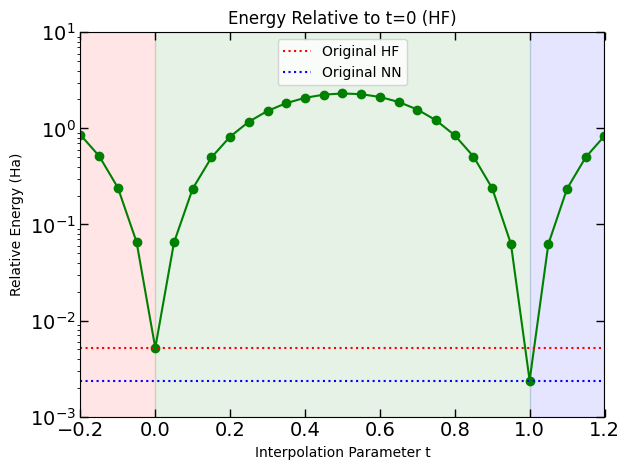

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

BOND_LENGTH = 2.3

def load_results(bond_length, results_dir="Data"):
    filename = f"{results_dir}/vqe_scan({bond_length}).json"
    if Path(filename).exists():
        with open(filename, 'r') as f:
            return json.load(f)
    else:
        print(f"Results file not found: {filename}")
        print("Please run the VQE scan experiment first.")
        return None

def plot_figure_5(bond_length=BOND_LENGTH):
    # Load results
    results = load_results(bond_length)
    if results is None:
        return
    
    # Extract data
    ts = np.array(results['t'])
    energies = np.array(results['energy'])
    converged = np.array(results['converged'])
    E_hf_orig = results['E_hf_original']
    E_nn_orig = results['E_nn_original']
    
    # Derive t_min and t_max from the data
    t_min = float(ts.min())
    t_max = float(ts.max())
    
    # Key indices
    idx_min = np.argmin(energies)
    idx_max = np.argmax(energies)
    
    print("\n=== Extended Scan Analysis ===")
    print(f"Global minimum: {energies[idx_min]:.8f} Ha at t={ts[idx_min]:.2f}")
    print(f"Global maximum: {energies[idx_max]:.8f} Ha at t={ts[idx_max]:.2f}")
    barrier = (energies[idx_max] - energies[idx_min]) * 627.509
    print(f"Barrier height: {barrier:.2f} kcal/mol")
    
    print("Warning: set E_ref manually")
    E_ref = -2.0140511195198982
    rel = (energies - E_ref)
    
    mpl.rcParams['pdf.fonttype'] = 42
    
    # Create plot (same as original)
    plt.figure()
    plt.plot(ts[converged], rel[converged], 'go-')
    plt.axhline(0, color='black', linestyle='-', alpha=0.3)
    plt.axvspan(t_min, 0, color='red', alpha=0.1)
    plt.axvspan(0, 1, color='green', alpha=0.1)
    plt.axvspan(1, t_max, color='blue', alpha=0.1)
    plt.tick_params(axis='both', direction='in', which='major', length=6, width=1, labelsize=14, top=True, right=True)
    plt.yscale('log')
    plt.xlim(-0.2, 1.2)
    plt.ylim(1e-3, 1e1)
    plt.axhline((E_hf_orig - E_ref), color='red', linestyle=':', label='Original HF')
    plt.axhline((E_nn_orig - E_ref), color='blue', linestyle=':', label='Original NN')
    
    plt.xlabel('Interpolation Parameter t')
    plt.ylabel('Relative Energy (Ha)')
    plt.title('Energy Relative to t=0 (HF)')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.savefig('figs/double_well.pdf', metadata={"TextAsShapes": False})
    plt.show()
    
    return idx_min, idx_max

if __name__ == "__main__":
    plot_figure_5(BOND_LENGTH)